# Data Analysis

## Task

Analyze course information provided by the Computer Science department at Emory University for the last 10 years (2008 ~ 2018).

## CSV File

Read [cs_courses_2008_2018.csv](../dat/cs_courses_2008_2018.csv), where each column contains the following information:

* `0`: Term
* `1`: Career
* `2`: Class Number
* `3`: Subject
* `4`: Catalog Number
* `5`: Section
* `6`: Title
* `7`: Topic
* `8`: Mininum Hours
* `9`: Maximum Hours
* `10`: Maximum Enrollment
* `11`: Enrollment
* `12`: Instructor Name
* `13`: Grade Basis
* `14`: Class Status

In [1]:
import csv

csv_file = '../dat/cs_courses_2008_2018.csv'

with open(csv_file) as fin:
    reader = csv.reader(fin)
    course_info = [row for i, row in enumerate(reader)]

print(len(course_info))

1254


Skip the header (first row) and courses that:

* have 0 enrollment, or
* have no instructor, or
* are not active.

In [9]:
def skip(i, row):
    return i == 0 or \
           int(row[11]) == 0 or \
           row[12].strip() == '' or \
           row[14].strip() != 'Active'

Select necessary information from each row.

In [17]:
def info(row):
    # term is normalized to (year, term_id) (e.g., 5181 -> (2018, 1))
    # term_id = 1: Spring, 6: Summer, 9: Fall
    r = row[0]
    term = (2000 + int((int(r) - 5000) / 10), int(r[-1]))

    return {'term': term,
            'subject': row[3].strip(),
            'catalog': row[4].strip(),
            'section': row[5].strip(),
            'title': row[6].strip(),
            'min_hours': int(row[8]),
            'max_hours': int(row[9]),
            'enrollment': int(row[11]),
            'instructor': row[12].strip()}

Putting all together by using nested functions.

In [22]:
def load_course_info(csv_file):
    def skip(i, row):
        return i == 0 or int(row[11]) == 0 or row[12].strip() == '' or row[14].strip() != 'Active'
    
    def info(row):
        r = row[0]
        term = (2000 + int((int(r) - 5000) / 10), int(r[-1]))
        
        return {'term': term,
                'subject': row[3].strip(),
                'catalog': row[4].strip(),
                'section': row[5].strip(),
                'title': row[6].strip(),
                'min_hours': int(row[8]),
                'max_hours': int(row[9]),
                'enrollment': int(row[11]),
                'instructor': row[12].strip()}

    course_info = None
    
    with open(csv_file) as fin:
        reader = csv.reader(fin)
        course_info = [info(row) for i, row in enumerate(reader) if not skip(i, row)]
    
    return course_info

course_info = load_course_info(csv_file)
for l in course_info: print(l)

{'term': (2009, 9), 'subject': 'CS', 'catalog': '170', 'section': '000', 'title': 'Intro to Computer Science I', 'min_hours': 4, 'max_hours': 4, 'enrollment': 29, 'instructor': 'Agichtein,Yevgeny Eugene'}
{'term': (2009, 9), 'subject': 'CS', 'catalog': '170', 'section': '000', 'title': 'Intro to Computer Science I', 'min_hours': 4, 'max_hours': 4, 'enrollment': 29, 'instructor': 'Agichtein,Yevgeny Eugene'}
{'term': (2010, 9), 'subject': 'CS', 'catalog': '170', 'section': '000', 'title': 'Intro to Computer Science I', 'min_hours': 4, 'max_hours': 4, 'enrollment': 28, 'instructor': 'Agichtein,Yevgeny Eugene'}
{'term': (2010, 9), 'subject': 'CS', 'catalog': '170', 'section': '000', 'title': 'Intro to Computer Science I', 'min_hours': 4, 'max_hours': 4, 'enrollment': 28, 'instructor': 'Agichtein,Yevgeny Eugene'}
{'term': (2008, 9), 'subject': 'CS', 'catalog': '171', 'section': '000', 'title': 'Intro to Computer Science II', 'min_hours': 4, 'max_hours': 4, 'enrollment': 7, 'instructor': 'Ag

## Enrollment

Retrieve the number of enrollments by terms.

In [23]:
def enrollment_by_term(course_info):
    enroll = {}
    for c in course_info:
        term = c['term']
        enroll[term] = enroll.get(term, 0) + c['enrollment']
    
    return enroll

d = enrollment_by_term(course_info)
for k, v in sorted(d.items()): print(k, v)

(2008, 9) 311
(2009, 1) 268
(2009, 6) 37
(2009, 9) 408
(2010, 1) 275
(2010, 6) 23
(2010, 9) 439
(2011, 1) 417
(2011, 6) 35
(2011, 9) 578
(2012, 1) 481
(2012, 6) 40
(2012, 9) 578
(2013, 1) 653
(2013, 6) 40
(2013, 9) 763
(2014, 1) 785
(2014, 6) 81
(2014, 9) 763
(2015, 1) 949
(2015, 6) 73
(2015, 9) 1016
(2016, 1) 1107
(2016, 6) 53
(2016, 9) 1099
(2017, 1) 1031
(2017, 6) 135
(2017, 9) 1191
(2018, 1) 1096


In [19]:
def term_to_year(term):
    """
    :param term: a tuple of (year, term_id).
    """
    return term[0] if term[1] == 9 else term[0] - 1

In [31]:
def enrollment_by_academic_year(course_info):
    enroll = {}
    for c in course_info:
        year = term_to_year(c['term'])
        enroll[year] = enroll.get(year, 0) + c['enrollment']
    
    return enroll

d = enrollment_by_academic_year(course_info)
for k, v in sorted(d.items()): print(k, v)

2008 616
2009 706
2010 891
2011 1099
2012 1271
2013 1629
2014 1785
2015 2176
2016 2265
2017 2287


Plot the number of enrollments by academic years.

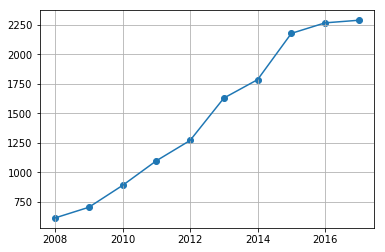

In [43]:
import matplotlib.pyplot as plt

def plot_dict(d):
    xs, ys = zip(*[(k, v) for k, v in sorted(d.items())])
    plt.scatter(xs, ys)
    plt.plot(xs, ys)
    plt.grid(b='on')
    plt.show()

plot_dict(d)

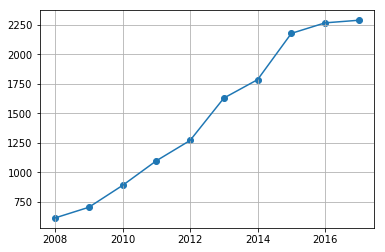

In [51]:
def enrollment_by_academic_year(course_info, regular=True, research=True, undergraduate=True, graduate=True):
    enroll = {}
    for c in course_info:
        catalog = c['catalog']
        
        if catalog != '130R' and 'R' in catalog:
            if not research: continue
        elif not regular:
            continue
            
        if int(catalog[0]) < 5:
            if not undergraduate: continue
        elif not graduate:
            continue
        
        year = term_to_year(c['term'])
        enroll[year] = enroll.get(year, 0) + c['enrollment']
    
    return enroll

d = enrollment_by_academic_year(course_info)
plot_dict(d)

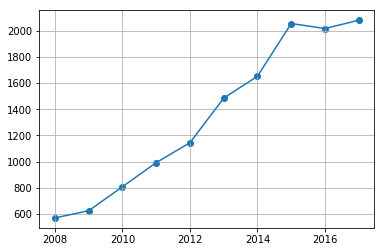

In [52]:
d = enrollment_by_academic_year(course_info, research=False)
plot_dict(d)

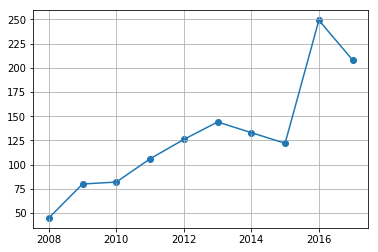

In [53]:
d = enrollment_by_academic_year(course_info, regular=False)
plot_dict(d)

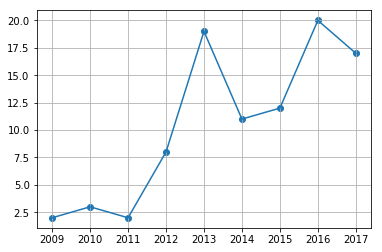

In [54]:
d = enrollment_by_academic_year(course_info, regular=False, graduate=False)
plot_dict(d)

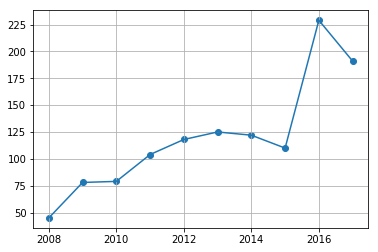

In [55]:
d = enrollment_by_academic_year(course_info, regular=False, undergraduate=False)
plot_dict(d)

## Instructor

In [ ]:
def instructor_by_term(course_info):
    inst = {}
    for c in course_info:
        term = c['term']
        instructor = c['instructor']
        inst.get(term, set()).add(instructor)
        
    
    return d

